# SOM - 2D CESM Practice - Basic uses of SOMPY library
## Used SSS, SST for practice using SOMPY
http://www.vahidmoosavi.com


https://github.com/sevamoo/sompy

### TO INSTALL: See README file in git. Conda environment .yml file is also available in our repo

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

In [ ]:
import os
import numpy as np
import xarray as xr

In [ ]:
import datetime

#### Prepare Data for MOdel
* Import data
* normalize
* View spatial map of data overlay using lat & lon








In [ ]:
#DATA_DIR = 'C:\\Users\\goyetc\\ocean-co2-absorption\\data'
DATA_DIR = '/Users/cg/co2/'
dataset_names = {'pCO2': 'pCO2_2D_mon_CESM001_1x1_198201-201701.nc',
                 'XCO2': 'XCO2_1D_mon_CESM001_native_198201-201701.nc',
                 'SST': 'SST_2D_mon_CESM001_1x1_198201-201701.nc',
                 'SSS': 'SSS_2D_mon_CESM001_1x1_198201-201701.nc',
                 'MLD': 'MLD_2D_mon_CESM001_1x1_198201-201701.nc',
                 'Chl': 'Chl_2D_mon_CESM001_1x1_198201-201701.nc'}
ds = {}
for dataset in dataset_names.keys():
    filename = os.path.join(DATA_DIR, dataset_names[dataset])
    ds[dataset] = xr.open_dataset(filename)

In [ ]:
df = {}
for dataset in ds.keys():
    # e.g. pCO2
    df[dataset] = ds[dataset][dataset].to_dataframe()
    
    #note np.isfinite eliminates infinite and/or NaN records from dataset 
    df[dataset] = df[dataset][np.isfinite(df[dataset][dataset])].reset_index()


In [ ]:
df['SSS'].head()

In [83]:
Driver_data = pd.concat([df['SSS'],df['MLD']['MLD'],df['SST']['SST'],df['Chl']['Chl']], axis=1)

#### choice of normalization or transform? 
* would like to try sample runs both ways and evaluate performance 

In [84]:
Driver_data.shape
#Driver_data.head()

(17290470, 7)

In [85]:
#Filter out outliers
Driver_data = Driver_data.loc[Driver_data['SSS'] > 8]

In [86]:
Driver_data.shape

(17275735, 7)

### Note above: 15k outliers from SSS removed, see scatterplots

## Create month specific dataframes

In [ ]:
Driver_data.set_index(pd.DatetimeIndex(Driver_data['time']))

In [88]:
Driver_data['month'] = pd.DatetimeIndex(Driver_data['time']).month

In [89]:
January = Driver_data.loc[Driver_data['month'] == 1]

In [90]:
January.shape

(1477260, 8)

In [ ]:
January.reset_index(drop=True)

In [ ]:
January = January.drop(columns=['time','month'])

In [167]:
sample = January.sample(800)

In [168]:
sample.head()

,ylat,xlon,SSS,MLD,SST,Chl
364624,74.5,191.5,31.834711,69.823639,-1.801598,0.015380
411731,-67.5,216.5,33.410538,31.267658,1.396750,0.066090
368408,87.5,173.5,32.605614,65.585266,-1.801202,0.012052
806247,16.5,170.5,34.401783,87.310944,25.910892,0.169363
1222378,44.5,223.5,32.818951,100.287773,10.978519,0.183820


In [166]:
Data1.shape

(800, 2)

In [172]:
sample1= sample[['SSS','SST']]
sample1.shape

(800, 2)

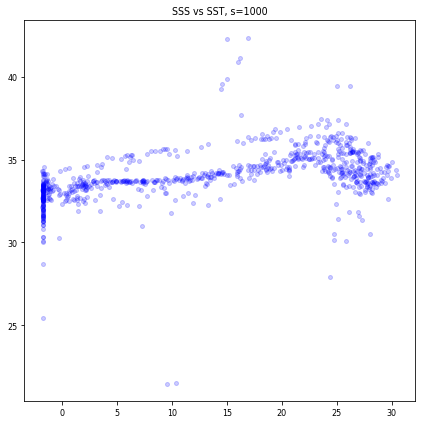

In [201]:
fig = plt.figure()
plt.plot(sample['SST'],sample['SSS'],'ob',alpha=0.2, markersize=4)
plt.title('SSS vs SST, s=1000')
fig.set_size_inches(7,7)

In [116]:
from pandas.plotting import scatter_matrix

In [141]:
sample_scatter = sample[['SSS','SST']].reset_index(drop=True)

In [145]:
from sklearn.preprocessing import StandardScaler

In [148]:
sample_scatter[['SSS','SST']] = StandardScaler().fit_transform(sample_scatter[['SSS','SST']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a175f27d0>,
      dtype=object)

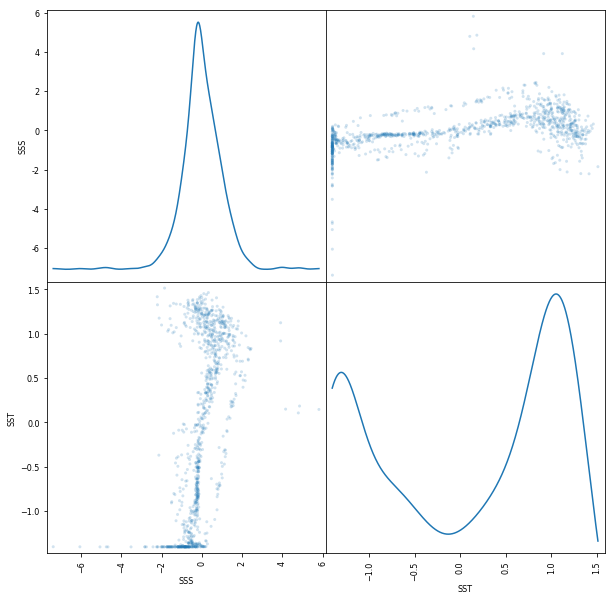

In [149]:
scatter_matrix(sample_scatter, alpha=0.2, figsize=(10,10), grid=False, diagonal='kde')

In [178]:
sample_scatter.head()

,SSS,SST
0,1.178483,0.757783
1,0.651759,0.387655
2,0.919363,1.224707
3,-1.719848,-1.405971
4,-1.064248,-1.406015


In [183]:
sample_scatter.dtypes

SSS    float64
SST    float64
dtype: object

In [185]:
ss_nd = sample_scatter.as_matrix()

/Users/cg/anaconda3/envs/sompy_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [198]:

mapsize = [20,20]
som = sompy.SOMFactory.build(ss_nd, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
 pca_linear_initialization took: 0.015000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 12

 epoch: 1 ---> elapsed time:  0.120000, quantization error: 0.266126

 epoch: 2 ---> elapsed time:  0.116000, quantization error: 0.167102

 epoch: 3 ---> elapsed time:  0.107000, quantization error: 0.136956

 epoch: 4 ---> elapsed time:  0.133000, quantization error: 0.128422

 epoch: 5 ---> elapsed time:  0.112000, quantization error: 0.118576

 epoch: 6 ---> elapsed time:  0.113000, quantization error: 0.110208

 epoch: 7 ---> elapsed time:  0.111000, quantization error: 0.102494

 epoch: 8 ---> elapsed time:  0.110000, quantization error: 0.094747

 epoch: 9 ---> elapsed time:  0.108000, quantization error: 0.086642

 epoch: 10 ---> elapsed time:  0.122000, quantization error: 0.079369

 epoch: 11 ---> elapsed time:  0.110000, quantization error: 0.072990

 epoch: 12 ---> elapsed time:  0.112000, quantization error: 0.065651

 Finetune tra

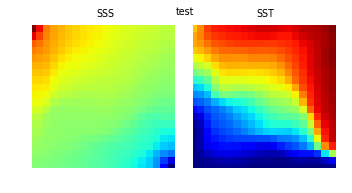

In [191]:
som.component_names = ['SSS','SST']
v = sompy.mapview.View2DPacked(20, 20, 'test',text_size=8)  
v.show(som, what='codebook', cmap='jet', col_sz=6) #which_dim='all' default


In [194]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 3,

## This 4-cluster product viewed in conjunction with the two feature-specific SOMs above makes sense.. 

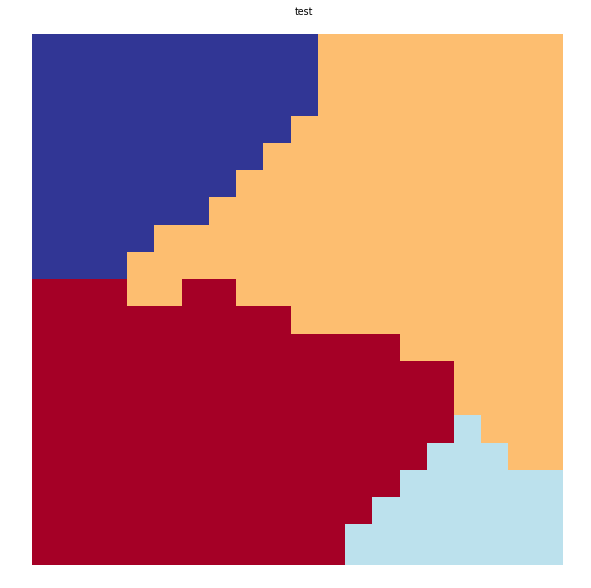

In [195]:
v.show(som, what='cluster')

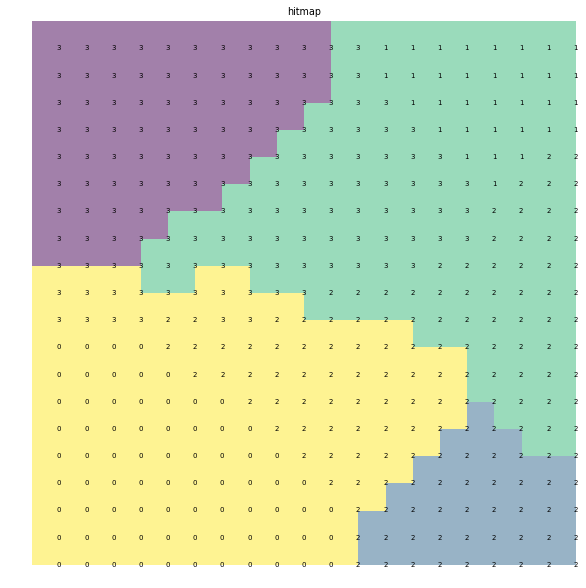

In [196]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

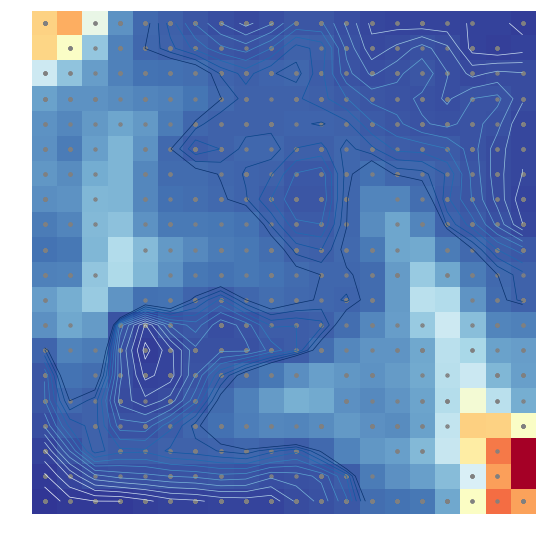

In [197]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)
